In [269]:
import pandas as pd
import numpy as np
import seaborn as sns 
COLORS = sns.color_palette()

%matplotlib inline

1. employee as df

In [270]:
employee = pd. read_csv('/Users/JIWON MOK/Desktop/project/Kmong/employee.csv')

2. Command "head, tail, shape, info"

In [271]:
employee.columns

Index(['UNIQUE_ID', 'POSITION_TITLE', 'DEPARTMENT', 'BASE_SALARY', 'RACE',
       'EMPLOYMENT_TYPE', 'GENDER', 'EMPLOYMENT_STATUS', 'HIRE_DATE',
       'JOB_DATE'],
      dtype='object')

In [272]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [273]:
employee.tail()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02
1999,1999,FIRE FIGHTER,Houston Fire Department (HFD),51194.0,Hispanic/Latino,Full Time,Male,Active,2009-01-12,2010-07-12


In [274]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        1886 non-null   float64
 4   RACE               1965 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           1997 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


3. change the columns to the lower cases

In [275]:
employee.columns = employee.columns.str.lower()

In [276]:
employee.columns

Index(['unique_id', 'position_title', 'department', 'base_salary', 'race',
       'employment_type', 'gender', 'employment_status', 'hire_date',
       'job_date'],
      dtype='object')

4. Check dtype and change to "datetime" form for the ones supposed to be shown as time.

In [277]:
employee['hire_date'] = pd.to_datetime(employee['hire_date'],
                                   infer_datetime_format=True)

employee['job_date'] = pd.to_datetime(employee['job_date'],
                                   infer_datetime_format=True)

employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unique_id          2000 non-null   int64         
 1   position_title     2000 non-null   object        
 2   department         2000 non-null   object        
 3   base_salary        1886 non-null   float64       
 4   race               1965 non-null   object        
 5   employment_type    2000 non-null   object        
 6   gender             2000 non-null   object        
 7   employment_status  2000 non-null   object        
 8   hire_date          2000 non-null   datetime64[ns]
 9   job_date           1997 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 156.4+ KB


5. See how many people per department 

In [278]:
employee_count = employee['employment_status'] =='Active'
employee['active_employee'] = employee_count
employee.groupby("department")['active_employee'].count()

department
Admn. & Regulatory Affairs         29
City Controller's Office            5
City Council                       11
Convention and Entertainment        1
Dept of Neighborhoods (DON)        17
Finance                            10
Fleet Management Department        36
General Services Department        22
Health & Human Services           110
Housing and Community Devp.        22
Houston Airport System (HAS)      106
Houston Emergency Center (HEC)     23
Houston Fire Department (HFD)     384
Houston Information Tech Svcs       9
Houston Police Department-HPD     638
Human Resources Dept.              24
Legal Department                   17
Library                            36
Mayor's Office                      5
Municipal Courts Department        28
Parks & Recreation                 74
Planning & Development              7
Public Works & Engineering-PWE    343
Solid Waste Management             43
Name: active_employee, dtype: int64

6. Name the department with the largest number of women employees.

 - "Houston Police Department-HPD"

In [279]:
female_count = employee['gender'] == 'Female'
employee['female_count'] = female_count
female_dept = employee.groupby('department').sum()['female_count'].sort_values(ascending=False)
female_dept

C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_22376\2685586959.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  female_dept = employee.groupby('department').sum()['female_count'].sort_values(ascending=False)


department
Houston Police Department-HPD     155
Public Works & Engineering-PWE    108
Health & Human Services            83
Houston Airport System (HAS)       36
Library                            28
Parks & Recreation                 23
Admn. & Regulatory Affairs         22
Municipal Courts Department        21
Houston Fire Department (HFD)      21
Human Resources Dept.              19
Houston Emergency Center (HEC)     17
Housing and Community Devp.        16
Legal Department                    9
Solid Waste Management              9
Dept of Neighborhoods (DON)         8
City Council                        7
City Controller's Office            4
Finance                             4
Fleet Management Department         3
Mayor's Office                      3
Planning & Development              3
General Services Department         2
Houston Information Tech Svcs       1
Convention and Entertainment        1
Name: female_count, dtype: int64

7. Name the department with the largest number of employees who are hispanic/ latino.

 - 'Houston Police Department-HPD'

In [280]:
hispanic_count = employee['race'] == 'Hispanic/Latino'
employee['hispanic_count'] = hispanic_count
hispanic_dept = employee.groupby('department').sum()['hispanic_count'].sort_values(ascending=False)
hispanic_dept

C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_22376\197989714.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hispanic_dept = employee.groupby('department').sum()['hispanic_count'].sort_values(ascending=False)


department
Houston Police Department-HPD     151
Houston Fire Department (HFD)      99
Public Works & Engineering-PWE     68
Houston Airport System (HAS)       30
Health & Human Services            27
Parks & Recreation                 20
General Services Department        10
Solid Waste Management             10
Fleet Management Department         9
Library                             9
Municipal Courts Department         7
Houston Emergency Center (HEC)      6
Admn. & Regulatory Affairs          6
Dept of Neighborhoods (DON)         5
Finance                             4
Housing and Community Devp.         3
Human Resources Dept.               3
Legal Department                    3
Planning & Development              3
Houston Information Tech Svcs       2
City Council                        2
City Controller's Office            1
Mayor's Office                      1
Convention and Entertainment        1
Name: hispanic_count, dtype: int64

8. Verify the difference between the average salary depending on the race. ( Including the graph )

- Men's average salary is closer to $60000 than women's salary. Compared to that, the women's is around $50,000, which is men's   average salary is higher than women's.

In [281]:
avgsalary_gender = employee.groupby("gender")['base_salary'].mean()

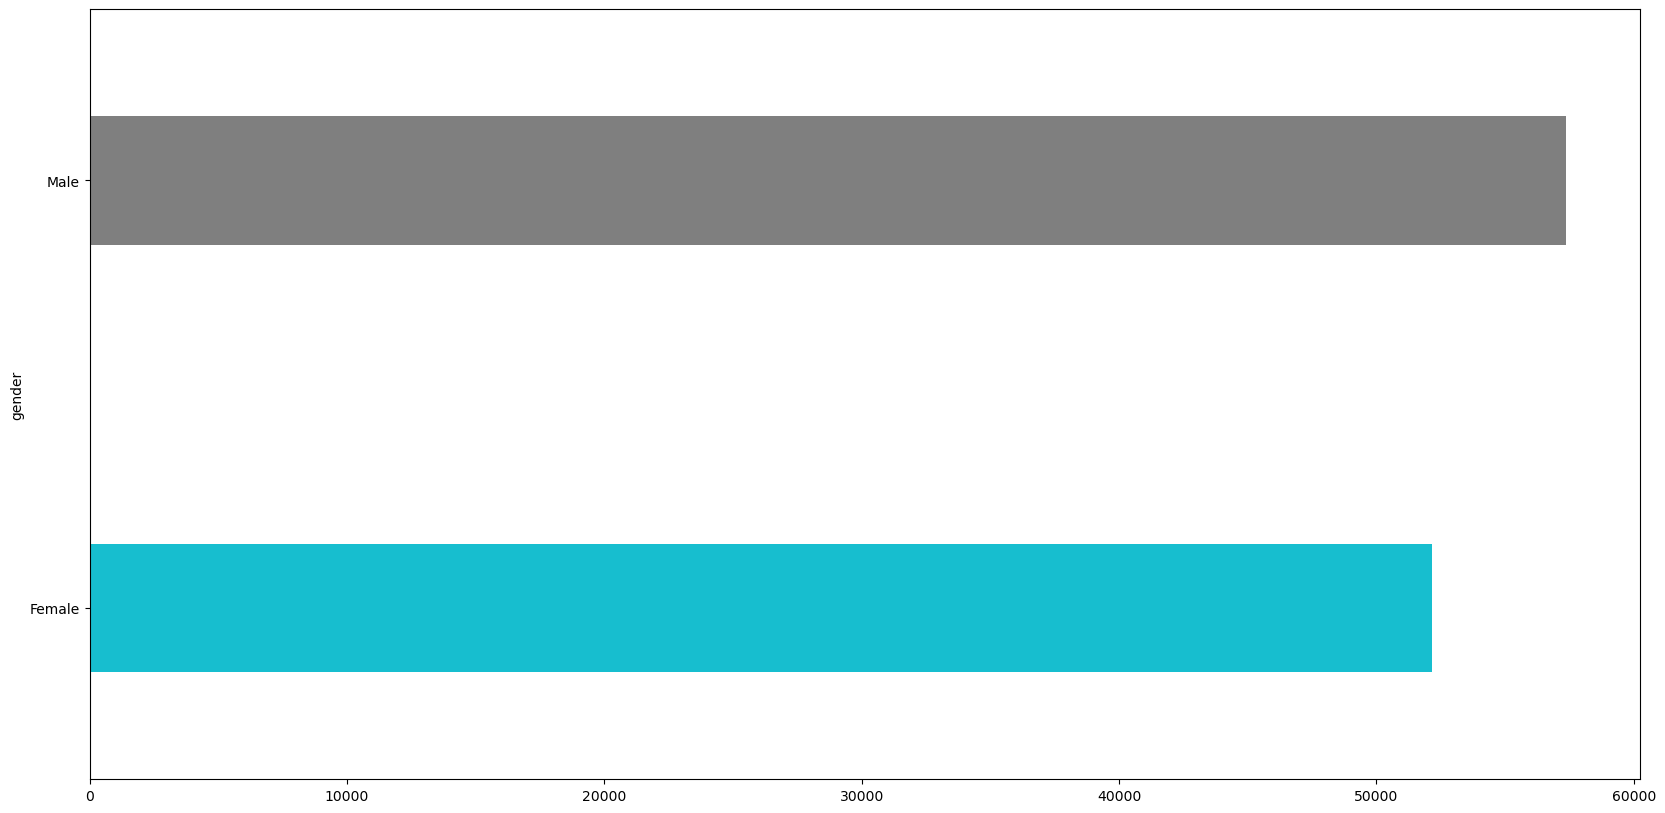

In [282]:
plot = avgsalary_gender.plot(kind = 'barh' , width = 0.3, color = [COLORS[-1],COLORS[-3]], figsize = (20, 10))

9. Verify the difference in the average salary depending on the race ( including the graph ) 

 - Below is the races listed in an ascending order.
   : White, Asian/Pacific Islander, American Indian or Alaskan Native, Hispanic/Latino, Others, and Black.

In [283]:
avgsalary_race = employee.groupby("race")['base_salary'].mean()

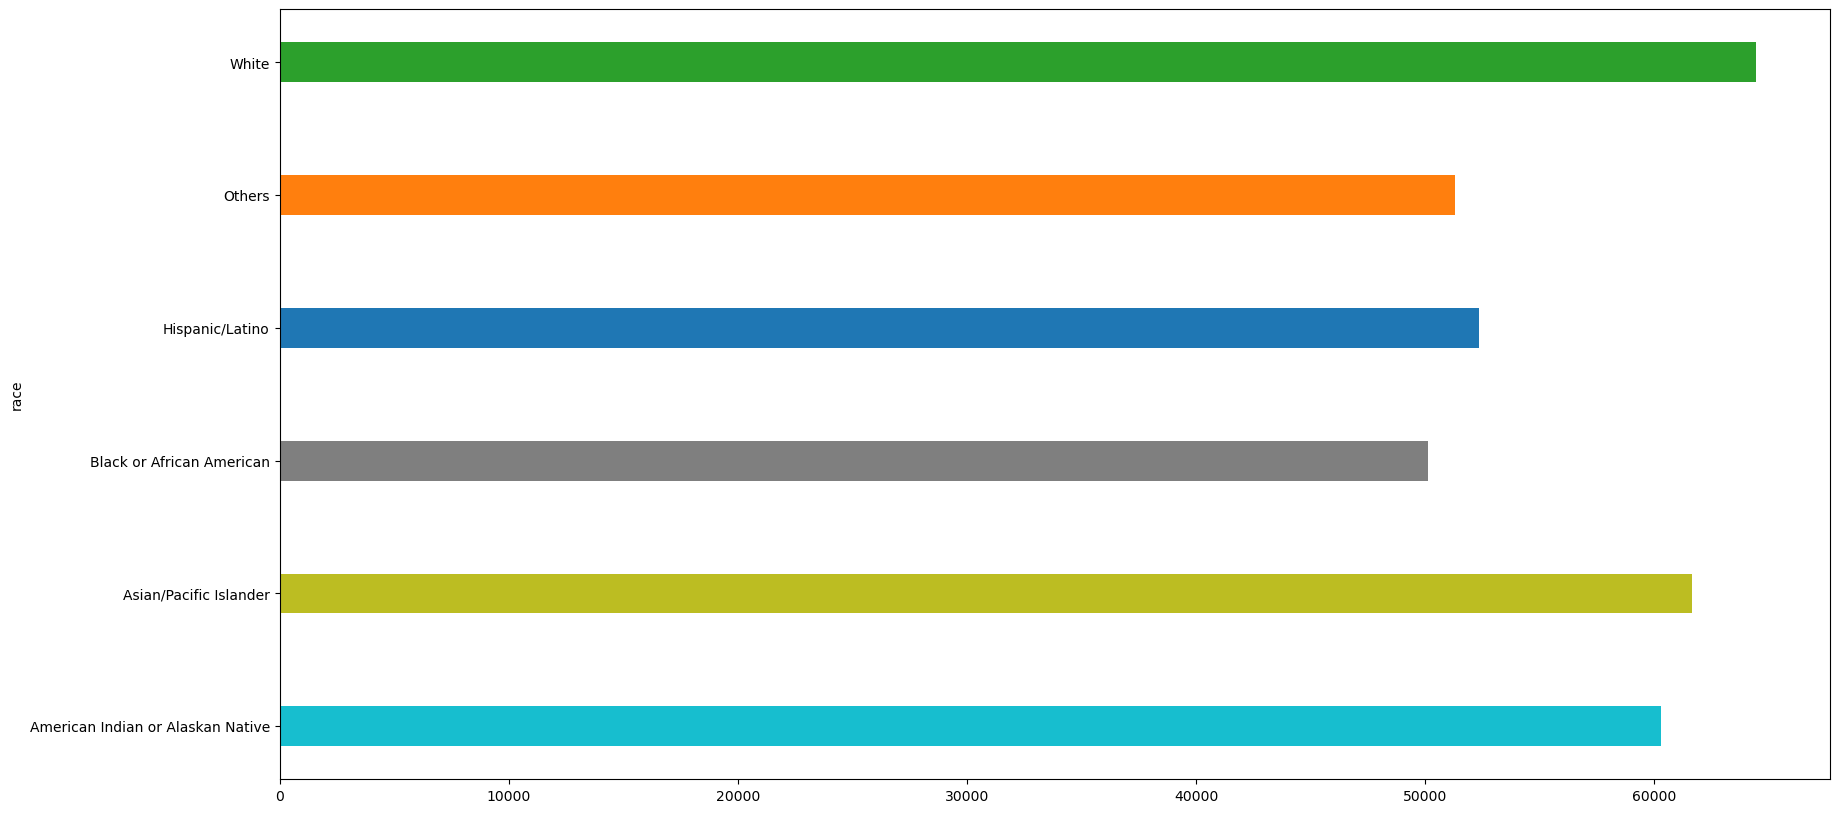

In [284]:
plot = avgsalary_race.plot(kind = 'barh' , width = 0.3, color = [COLORS[-1], COLORS[-2], COLORS[-3], COLORS[0],COLORS[1], COLORS[2]], figsize = (20, 10))

10. Verify the differene in the average salary of the roles in admin & regulatory affairs department ( Including the graph )
  - Among all employees who are in executive level, deputy director's average salary is the highest and then assisant director     and deputy assisatn director. The role with the lowest salary is Animal care technican and next lowest is regulatory           Investigator and parking enforcement officer whose salary is positioned at around $20,000. 

In [285]:
#position_title 별로의 base_salary
admin_employee = employee.loc[(employee.department == 'Admn. & Regulatory Affairs'),]
avgsalary_role = admin_employee.groupby("position_title").mean()['base_salary'].sort_values(ascending=False)

C:\Users\JIWON MOK\AppData\Local\Temp\ipykernel_22376\1462312826.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgsalary_role = admin_employee.groupby("position_title").mean()['base_salary'].sort_values(ascending=False)


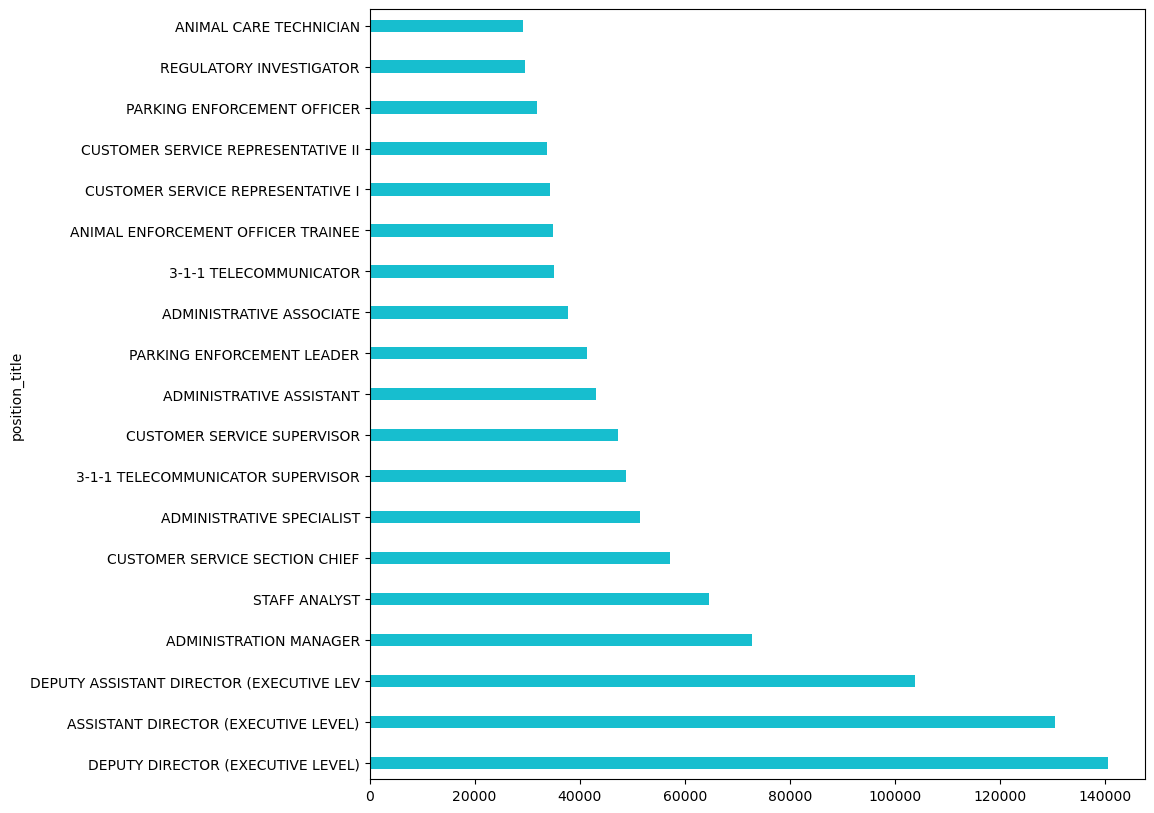

In [286]:
plot = avgsalary_role.plot(kind = 'barh' , width = 0.3, color = COLORS[-1], figsize = (10, 10))

11. The max/min of the salary depending on the race and gender.
    
    Depending on the race, Black or African American recorded 24960 / 27500 as the min/max.
    When it comes to the gender, male's highest is 275000, women's is 178331.
    Male's minimum is 26104 and the female's is 24960.

In [301]:
employee.groupby('race')['base_salary'].min().sort_values(ascending=True)

race
Black or African American            24960.0
Hispanic/Latino                      26104.0
American Indian or Alaskan Native    26125.0
Asian/Pacific Islander               26125.0
White                                26125.0
Others                               38771.0
Name: base_salary, dtype: float64

In [300]:
employee.groupby('race')['base_salary'].max().sort_values(ascending=False)

race
Black or African American            275000.0
White                                210588.0
Hispanic/Latino                      165216.0
Asian/Pacific Islander               163228.0
American Indian or Alaskan Native     98536.0
Others                                63785.0
Name: base_salary, dtype: float64

In [302]:
employee.groupby('gender')['base_salary'].max().sort_values(ascending=False)

gender
Male      275000.0
Female    178331.0
Name: base_salary, dtype: float64

In [303]:
employee.groupby('gender')['base_salary'].min().sort_values(ascending=True)

gender
Female    24960.0
Male      26104.0
Name: base_salary, dtype: float64

12. Subset the female employees whose salary is >= 80000 and < 120000

In [291]:

employee_female = employee[((employee['base_salary']>= 80000) & (employee['base_salary']< 120000))& (employee['gender'] == 'Female')]
employee_female


,unique_id,position_title,department,base_salary,race,employment_type,gender,employment_status,hire_date,job_date,active_employee,female_count,hispanic_count
61,61,IT PROJECT MANAGER,Houston Fire Department (HFD),96668.0,Black or African American,Full Time,Female,Active,1998-04-07,2006-01-28,True,True,False
66,66,"PUBLIC HEALTH DENTIST,DDS",Health & Human Services,100791.0,White,Full Time,Female,Active,2015-12-28,2015-12-28,True,True,False
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21,True,True,False
136,136,POLICE SERGEANT,Houston Police Department-HPD,81239.0,White,Full Time,Female,Active,1991-02-04,2005-02-12,True,True,False
197,197,ADMINISTRATIVE COORDINATOR,Houston Emergency Center (HEC),84456.0,Black or African American,Full Time,Female,Active,1987-12-07,2013-12-07,True,True,False
236,236,SENIOR COUNCIL AIDE (EXECUTIVE LEVEL),City Council,100000.0,Black or African American,Full Time,Female,Active,2005-03-10,2014-01-02,True,True,False
259,259,DIVISION MANAGER,Finance,95773.0,Hispanic/Latino,Full Time,Female,Active,2010-01-25,2013-12-07,True,True,True
265,265,LABORATORY MANAGER,Health & Human Services,81849.0,White,Full Time,Female,Active,2008-05-19,2014-06-07,True,True,False
304,304,SENIOR CONTRACT ADMINISTRATOR,Health & Human Services,81972.0,Black or African American,Full Time,Female,Active,2001-08-20,2001-08-20,True,True,False
366,366,DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV,Mayor's Office,110000.0,White,Full Time,Female,Active,2014-05-13,2014-05-13,True,True,False


13. Get IQR of the Black or African American's salary.

    IQR 은 25938.75 ( Q3 - Q1 )

In [292]:
afro_american_salary = employee.loc[employee.race =='Black or African American', ['race','base_salary']]

In [293]:
afro_american_salary.describe()

,base_salary
count,670.000000
mean,50137.801493
std,21421.780266
min,24960.000000
25%,35287.250000
50%,45744.500000
75%,61226.000000
max,275000.000000


In [294]:
Q1 = afro_american_salary.describe()['base_salary']['25%']
Q3 = afro_american_salary.describe()['base_salary']['75%']
IQR = Q3 - Q1
Q2 = afro_american_salary.describe()['base_salary']['50%']

print( "Q1 : ", Q1, 
       "Q3 :", Q3,
       "IQR : ", IQR, 
       "Q2 : ", Q2)

Q1 :  35287.25 Q3 : 61226.0 IQR :  25938.75 Q2 :  45744.5


14. Data cleansing : remove the null and subset Dataset. 

In [295]:
print(employee.isnull().sum())

unique_id              0
position_title         0
department             0
base_salary          114
race                  35
employment_type        0
gender                 0
employment_status      0
hire_date              0
job_date               3
active_employee        0
female_count           0
hispanic_count         0
dtype: int64


In [296]:
employee = employee[pd.notnull(employee['base_salary'])&(employee['race'])&pd.notnull(employee['job_date'])]
print(employee.isnull().sum())

unique_id            0
position_title       0
department           0
base_salary          0
race                 0
employment_type      0
gender               0
employment_status    0
hire_date            0
job_date             0
active_employee      0
female_count         0
hispanic_count       0
dtype: int64


15. When the overall average salary is above than the average salary, create the variables "above_avg" else, "below_avg".

In [297]:
avg_salary = employee['base_salary'].mean()

In [298]:
employee["above/below_avg"] = ["above_avg" if x > avg_salary else "below_avg" for x in employee['base_salary']]
employee

,unique_id,position_title,department,base_salary,race,employment_type,gender,employment_status,hire_date,job_date,active_employee,female_count,hispanic_count,above/below_avg
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,True,True,True,above_avg
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,True,True,True,below_avg
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,True,False,False,below_avg
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,True,False,False,above_avg
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,True,False,False,above_avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09,True,False,False,below_avg
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,True,False,False,above_avg
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13,True,False,False,below_avg
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02,True,False,False,below_avg
